# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load Training Data

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Visualize the number of survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

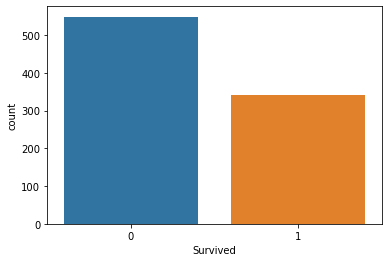

In [6]:
sns.countplot(titanic['Survived'])

In [7]:
features = ['Pclass','Sex','Parch','SibSp','Embarked']

# Visualize the count of survivors for the column Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

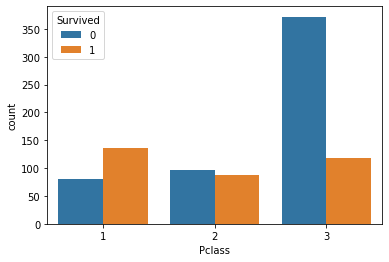

In [8]:
sns.countplot(titanic['Pclass'], hue = titanic['Survived'])

# Visualize the count of survivors for the column Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

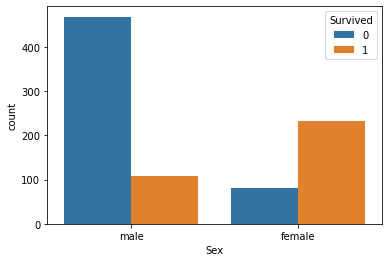

In [9]:
sns.countplot(titanic['Sex'], hue = titanic['Survived'])

# Visualize the count of survivors for the column Parch

<AxesSubplot:xlabel='Parch', ylabel='count'>

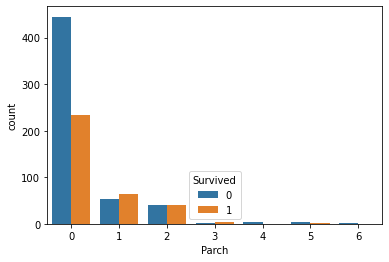

In [10]:
sns.countplot(titanic['Parch'], hue = titanic['Survived'])

# Visualize the count of survivors for the column SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

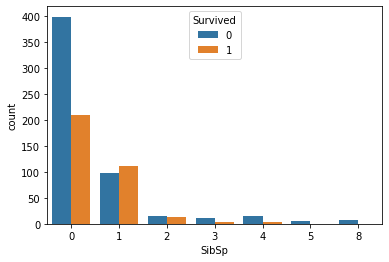

In [11]:
sns.countplot(titanic['SibSp'], hue = titanic['Survived'])

# Visualize the count of survivors for the column Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

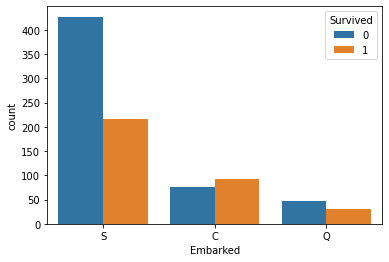

In [12]:
sns.countplot(titanic['Embarked'], hue = titanic['Survived'])

# Visualize the count of survivors for the column Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

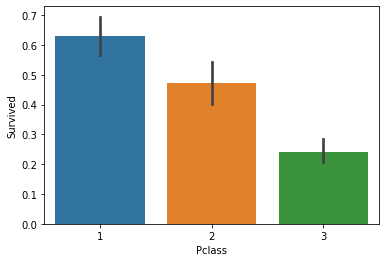

In [13]:
sns.barplot(titanic['Pclass'], titanic['Survived'])

# Survival rate by Sex

In [14]:
titanic.pivot_table('Survived', index = 'Sex')

,Survived
Sex,
female,0.742038
male,0.188908


# Visualizasion of Survival rate by Sex

<AxesSubplot:xlabel='Sex'>

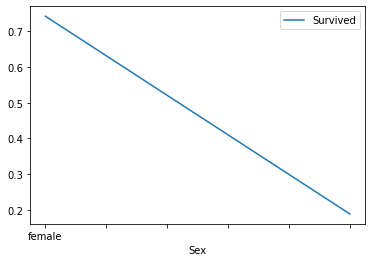

In [15]:
titanic.pivot_table('Survived', index = 'Sex').plot()

# Survival rate by Sex and Pclass

In [16]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Visualization of Survival rate by Sex and Pclass

<AxesSubplot:xlabel='Sex'>

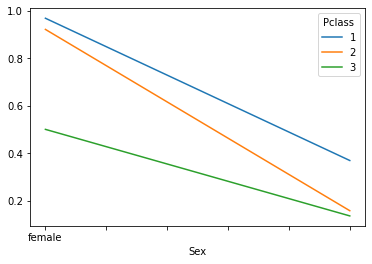

In [17]:
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

# Checking for NULL values

In [18]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning for Training set

In [19]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age'], axis = 1)
#titanic_test['Age'].fillna(value=titanic_test.Age.mean(), inplace=True)
titanic['Embarked'].fillna(value=(titanic['Embarked'].value_counts().idxmax()), inplace=True)
titanic['Fare'].fillna(value=titanic['Fare'].mean(), inplace=True)

In [20]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [21]:
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [22]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Encoding non-numeric data to numeric data

In [23]:
titanic = pd.get_dummies(titanic)

In [24]:
titanic.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


In [25]:
X = titanic.drop(['Survived'], axis = 1)
y = titanic['Survived']

# As we have the test data seperately we now split the training data to get Validation data

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Load Testing data

In [27]:
titanic_test = pd.read_csv('test.csv')

# Clean testing data and repeat the same procedures as that of training data

In [28]:
titanic_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
X_test = titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Age'], axis = 1)
#X_test['Age'].fillna(value=X_test.Age.mean(), inplace=True)
X_test['Embarked'].fillna(value=(X_test['Embarked'].value_counts().idxmax()), inplace=True)
X_test['Fare'].fillna(value=X_test['Fare'].mean(), inplace=True)

In [30]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


In [31]:
#titanic_test['Sex'] = labelencoder.fit_transform(titanic_test['Sex'].values)
#titanic_test['Embarked'] = labelencoder.fit_transform(titanic_test['Embarked'].values)

In [32]:
X_test = pd.get_dummies(X_test)

In [33]:
X_test.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,7.8292,0,1,0,1,0
1,3,1,0,7.0000,1,0,0,0,1
2,2,0,0,9.6875,0,1,0,1,0
3,3,0,0,8.6625,0,1,0,0,1
4,3,1,1,12.2875,1,0,0,0,1


# Using Random Forest to train and fit the Training Data

In [34]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [35]:
print('Training Accuracy', forest.score(X_train, y_train))

Training Accuracy 0.9185393258426966


In [36]:
cm = confusion_matrix(y_val, forest.predict(X_val))
TN, FP, FN, TP = confusion_matrix(y_val, forest.predict(X_val)).ravel()
print(cm)
print('Validation Accuracy',(TP + TN) / (TP + TN + FN + FP))

[[89 16]
 [20 54]]
Validation Accuracy 0.7988826815642458


# Using the same random forest model to predict the test data and save it as testpredictions.csv

In [37]:
predictions = forest.predict(X_test)

output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Name': titanic_test.Name, 'Survived': predictions})
output.to_csv('testpredictions.csv', index=False)